In [3]:
import numpy as np
import math
import matplotlib.pyplot as plt



In [11]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))


In [12]:
x_values = np.linspace(-10, 10, 400)
y_values = sigmoid(x_values)


Text(0.5, 1.0, 'sigmoid function')

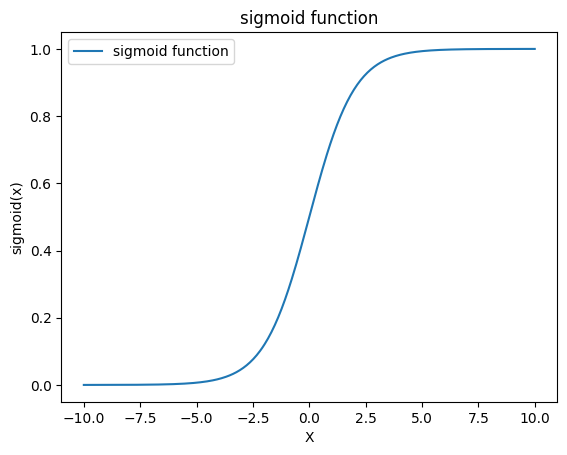

In [14]:
plt.plot(x_values,y_values,label='sigmoid function')
plt.xlabel("X")
plt.ylabel("sigmoid(x)")
plt.legend()
plt.title("sigmoid function")

In [18]:
def loss(y_true, y_pred):
    epsilon = 1e-9
    y1 = y_true * np.log(y_pred + epsilon)
    y2 = (1-y_true) * np.log(1 - y_pred + epsilon)
    return -np.mean(y1 + y2)

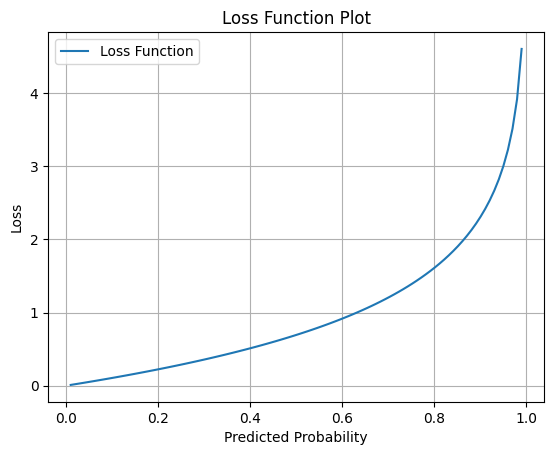

In [ ]:
y_true = np.array([0, 1])  
y_pred = np.linspace(0.01, 0.99, 100)  

# Calculate loss for each predicted value
loss_values = [loss(y_true, np.array([p, 1-p])) for p in y_pred]

# Plot the loss function
plt.plot(y_pred, loss_values, label="Loss Function")
plt.title("Loss Function Plot")
plt.xlabel("Predicted Probability")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()